In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

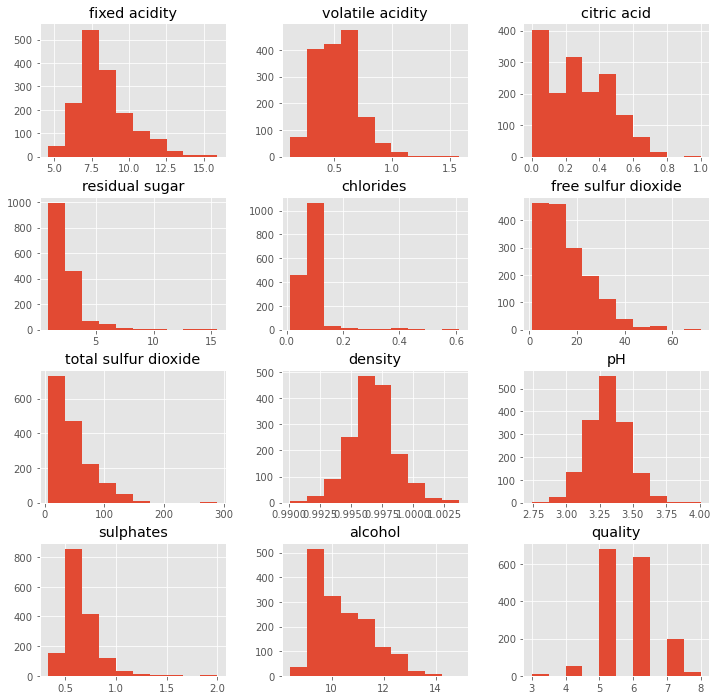

In [244]:
plt.style.use('ggplot')
pd.DataFrame.hist(df, figsize=(12,12))

# the range of the predictor variables differs greatly, Any algorithm, such as k-NN, which cares about the distance 
# between data points, may thus focus squarely and unfairly on variables with a larger range.

In [245]:
X=df.drop('quality', axis=1).values
y1=df.quality.values

np.unique(y1)

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [246]:
x=np.multiply(df.quality>5,1)
df=pd.concat([df, x], axis=1)
df.columns.values[-1]='boolean'

Text(0.5, 1.0, 'Aggregated target value')

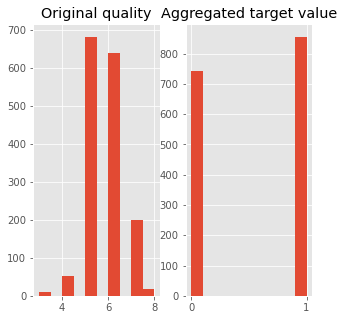

In [247]:
# split quality column to values 0 (bad quality) and 1 (good quality)  -> threshold: 5
import numexpr

# y=numexpr.evaluate('(y1 <=5)')
# y

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.hist(y1)
plt.title('Original quality')

plt.subplot(1,2,2)
plt.hist(df['boolean'])
plt.xticks([0,1])
# plt.xlim()
plt.title('Aggregated target value')


In [248]:
#********************************************************TRAIN TEST SPLIT

# In the case of a dataset with balanced classes (where all target values are ~ equally represented), data scientists 
# commonly look at accuracy as a performance measure.

from sklearn.model_selection import train_test_split #or:
# from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


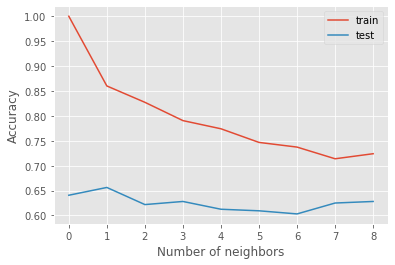

In [256]:
#******************COMPARISON - DIFFERENT NUMBER OF THE NEIGHBORS:
from sklearn import neighbors

neighb=np.arange(1,10)
train_accuracy=np.empty(len(neighb))
test_accuracy=np.empty(len(neighb))

for i, j in enumerate(neighb):
    KNN=neighbors.KNeighborsClassifier(n_neighbors = j)
    model=KNN.fit(X_train, y_train)
    train_accuracy[i]=model.score(X_train, y_train)
    test_accuracy[i]=model.score(X_test, y_test)
    
plt.plot(train_accuracy, label='train')
plt.plot(test_accuracy, label='test')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()

In [257]:
#********************************************************MODEL:
from sklearn import neighbors, linear_model

KNN=neighbors.KNeighborsClassifier(n_neighbors = 5)
model=KNN.fit(X_train, y_train)
model

KNeighborsClassifier()

In [258]:
predictions=model.predict(X_test)

In [259]:
#*************************************************SCORE - WITHOUT PREPROCESSING:
score=model.score(X_test, y_test)
print(f'Accuracy for test set: {score}')

Accuracy for test set: 0.6125


In [260]:
from sklearn.metrics import classification_report

report=classification_report(predictions, y_test)
print(report)

              precision    recall  f1-score   support

       False       0.64      0.66      0.65       175
        True       0.57      0.56      0.57       145

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



PREPROCESSING: SCALING AND CENTERING:

-these transformations merely change the range of the data and not the distribution (distribution will be changed using e.g. log transform or a Box-Cox transform, to make your data look more Gaussian (like a bell-curve))


- normalization means is scaling a dataset so that its minimum is 0 and its maximum 1
                    x_normalized=(x-x_min)/(x_max-x_min)
                    
                    
- Stardardization -it's job is to center the data around 0 and to scale with respect to the standard deviation:
                    x_standardized=(x-x_mean)/std



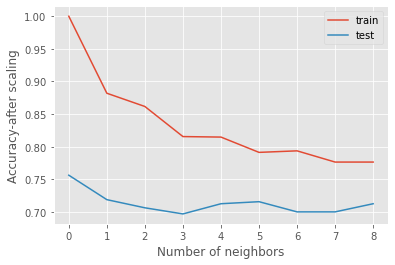

In [261]:
#******************COMPARISON - DIFFERENT NUMBER OF NEIGHBORS - SCALED DATASET:

neighb=np.arange(1,10)
train_accuracy_scaled = np.empty(len(neighb))
test_accuracy_scaled=np.empty(len(neighb))

for m, n in enumerate(neighb):
    KNN=neighbors.KNeighborsClassifier(n_neighbors=n)
    model_s=KNN.fit(Xs_train, y_train)
    train_accuracy_scaled[m]=model_s.score(Xs_train, y_train)
    test_accuracy_scaled[m]=model_s.score(Xs_test, y_test)

plt.plot(train_accuracy_scaled, label='train') 
plt.plot(test_accuracy_scaled, label='test')
plt.xlabel("Number of neighbors")
plt.ylabel('Accuracy-after scaling')
plt.legend()


In [262]:
#**********************************************SCALING:
from sklearn.preprocessing import scale

X_scaled=scale(X) # the whole X value is scaled - then split on X_train and X_test

Xs_train, Xs_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

KNN=neighbors.KNeighborsClassifier(n_neighbors=5)
model_s=KNN.fit(Xs_train, y_train)
model_s

KNeighborsClassifier()

In [263]:
accuracy_scaled=model_s.score(Xs_test, y_test)
print(f'Accuracy of test set based on the model trained on scaled data : {accuracy_scaled}')

Accuracy of test set based on the model trained on scaled data : 0.7125


In [265]:
predictions_s=model_s.predict(Xs_test)

report_s=classification_report(predictions_s, y_test)
print(report)

              precision    recall  f1-score   support

       False       0.64      0.66      0.65       175
        True       0.57      0.56      0.57       145

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



The two main reasons for scaling data are:

- Your predictor variables may have significantly different ranges and, in certain situations, such as when implementing k-NN, this needs to be mitigated so that certain features do not dominate the algorithm;
- You want your features to be unit-independent, that is, not reliant on the scale of the measurement involved: for example, you could have a measured feature expressed in meters and I could have the same feature expressed in centimeters. If we both scale our respective data, this feature will be the same for each of us.

- Classification task: A supervised learning task is a classification task if the target variable consists of categories (e.g. 'click' or 'not', 'malignant' or 'benign' tumour).

- Regression task: A supervised learning task is a regression task if the target variable is a continuously varying variable (e.g. price of a house) or an ordered categorical variable such as 'quality rating of wine'.

- k-Nearest Neighbors: An algorithm for classification tasks, in which a data point is assigned the label decided by a majority vote of its k nearest neighbors.

In [266]:
col=df.columns.tolist()
col=col[:-2]
col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [288]:
k=np.empty(len(col))
    
while True:
    for i, c in enumerate(col): 
        k[i]=float(input(f'Please provide value for the {c}: '))
    pred=model_s.predict(np.array([k]))
    pred='Good quality' if int(pred[0])==1 else 'Bad quality'
    print(f'The suggested wine quality for the given conditions: {pred}\n', sep='')
    rep=input('Do you want to continue? If yes, press "Yes": ')
    if rep.lower() !='yes':
        print('Finish')
        break

Please provide value for the fixed acidity: 5.5
Please provide value for the volatile acidity: 0.49
Please provide value for the citric acid: 0.03
Please provide value for the residual sugar: 1.8
Please provide value for the chlorides: 0.044
Please provide value for the free sulfur dioxide: 28
Please provide value for the total sulfur dioxide: 87
Please provide value for the density: 0.99080
Please provide value for the pH: 3.5
Please provide value for the sulphates: 0.82
Please provide value for the alcohol: 14
The suggested wine quality for the given conditions: Good quality

Do you want to continue? If yes, press "Yes": yes
Please provide value for the fixed acidity: 12.6
Please provide value for the volatile acidity: 0.31
Please provide value for the citric acid: 0.76
Please provide value for the residual sugar: 2.2
Please provide value for the chlorides: 0.072
Please provide value for the free sulfur dioxide: 6
Please provide value for the total sulfur dioxide: 29
Please provide v